In the previous task we implemented neural networks from scratch. Now we will see how we can implement neural networks in Tensorflow.

## **Tensorflow**
- TensorFlow is an open-source machine learning framework developed by Google. 
- It is widely used for building and deploying machine learning and deep learning models. 
- TensorFlow provides a comprehensive ecosystem of tools, libraries, and resources that help developers and researchers build and deploy machine learning models with ease.

## **Keras**
Keras is the high-level API of the TensorFlow platform. It provides an approachable, highly-productive interface for solving machine learning (ML) problems, with a focus on modern deep learning. Keras covers every step of the machine learning workflow, from data processing to hyperparameter tuning to deployment.

The core data structures of Keras are layers and models. 
#### **Layers**
- The `tf.keras.layers.Layer` class is the fundamental abstraction in Keras. 
- A Layer encapsulates a state (weights) and some computation (defined in the `tf.keras.layers.Layer.call` method).

#### **Models**
- A model is an object that groups layers together and that can be trained on data.
- The simplest type of model is the Sequential model, which is a linear stack of layers.
- The `tf.keras.Model` class features built-in training and evaluation methods:
    - `tf.keras.Model.fit`: Trains the model for a fixed number of epochs.
    - `tf.keras.Model.predict`: Generates output predictions for the input samples.
    - `tf.keras.Model.evaluate`: Returns the loss and metrics values for the model; configured via the tf.keras.Model.compile method.

### **Other APIs and tools**
Keras provides many other APIs and tools for deep learning, including:
- Optimizers
- Metrics
- Losses
- Data loading utilities

## **Artificial Neural Network in TensorFlow**

The most basic things that we want tounderstand is that in a neural network there are to calculations that are happening in the neurons:
1. Sum of all the weights
2. Activation function

And any neural network consists of three types of layers.
1. Input Layer
2. Hidden Layers
2. Output Layer


The quality and performance of a neural network largely depend on several key features, including the architecture (layers), the choice of activation function, loss function, and optimizer. Each of these components plays a critical role in how the network learns and generalizes to new data. Here’s a detailed explanation of each:

### **1. Layers**
Neural networks consist of multiple layers of interconnected neurons, where each layer transforms the input data through weighted connections.

- **Input Layer**: The first layer of the neural network that receives the input data. The number of neurons in this layer corresponds to the number of features in the input data.
- **Hidden Layers**: These layers are located between the input and output layers and are responsible for learning the complex patterns in the data. The number of hidden layers and the number of neurons in each layer (depth and width) are crucial design choices. Deep networks with more hidden layers can model more complex relationships but may also be prone to overfitting.
- **Output Layer**: The final layer that produces the network’s predictions. The number of neurons in this layer depends on the type of task:
  - **Classification**: The output layer might have a softmax activation with neurons corresponding to the number of classes.
  - **Regression**: The output layer typically has a single neuron with a linear activation function.
The structure and number of layers significantly affect the network's ability to learn from data and generalize to unseen data.

### **2. Activation Function**
The activation function defines how the output of a neuron is computed from its input. It introduces non-linearity into the network, enabling it to model complex relationships.

- **Sigmoid**: Produces outputs between 0 and 1, useful in binary classification tasks. However, it can suffer from the vanishing gradient problem, making training deep networks difficult.
- **ReLU (Rectified Linear Unit)**: Outputs the input directly if it is positive; otherwise, it outputs zero. ReLU is widely used because it reduces the likelihood of the vanishing gradient problem and accelerates convergence.
- **Tanh**: Similar to sigmoid but outputs values between -1 and 1, allowing for stronger gradients. It is often used in practice but can still suffer from the vanishing gradient problem.
- **Leaky ReLU**: A variation of ReLU that allows a small, non-zero gradient when the input is negative, which helps prevent the dying ReLU problem (where neurons can become inactive during training).
- **Softmax**: Used in the output layer of classification networks to convert logits into probabilities, ensuring the outputs sum to one.

The choice of activation function affects how well the network can learn and generalize, and different layers can use different activation functions.

### **3. Loss Function**
The loss function measures how well the neural network's predictions match the actual data. During training, the network tries to minimize this loss, guiding the optimization process.

- **Mean Squared Error (MSE)**
- **Cross-Entropy Loss**
- **Hinge Loss**

### **4. Optimizer**
The optimizer determines how the network’s weights are updated during training to minimize the loss function. Different optimizers implement various strategies for adjusting the weights, influencing the speed and quality of convergence.

- **Stochastic Gradient Descent (SGD)**: Updates the weights based on the gradient of the loss function with respect to the weights. SGD can be noisy, but this noise can help escape local minima. However, it may converge slowly and is sensitive to the learning rate.
- **Adam (Adaptive Moment Estimation)**: Combines the advantages of two other extensions of SGD, namely AdaGrad and RMSProp. It maintains a per-parameter learning rate that adapts as learning unfolds, making it well-suited for problems with sparse gradients. Adam is one of the most widely used optimizers due to its robustness and efficiency.

The optimizer’s performance can significantly influence how quickly the network learns and how well it converges to an optimal solution.

Here is a step by step guide on how we can create a model in keras.

---
# **Building a Neural Network**

## **1. Define the model**
The first stage of model buiding is to define the sequential model. For that first we will import keras from tensorflow and layers from keras.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures


Here we will use sequential model. 

**As sequential model is appropriate** for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

**A Sequential model is not appropriate when:**

- Your model has multiple inputs or multiple outputs
- Any of your layers has multiple inputs or multiple outputs
- You need to do layer sharing
- You want non-linear topology (e.g. a residual connection, a multi-branch model)

We can create sequential model using couple of techniques.



#### **Method 1**
If we want to create a model we need to specify the type of layers we are using, the number of layers, number of neurons in each layer and the activation function used in each layer. 

In [38]:
model = Sequential(
    [
        # input layer (2 neurons)
        Dense(4, input_shape = (2,), activation = 'relu'),
        # hidden layers
        Dense(4, activation = 'relu'),
        Dense(4, activation = 'relu'),
        # output layer
        Dense(2, activation = 'sigmoid'),
    ])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


From the above code a network like beow will be created.

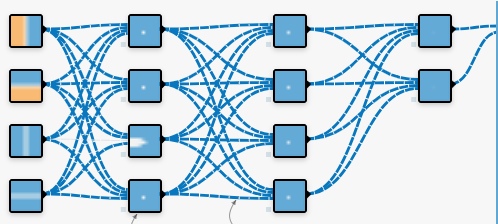

In the above network the first layer is the input layer, while the last layer is the output layer.

#### **Method 2**
We can create the same above model using a different metod also.

In [30]:
model2 = Sequential()
model2.add(Dense(4, input_shape = (2,), activation = "relu"))
model2.add(Dense(4, activation = "relu"))
model2.add(Dense(4, activation = 'relu'))
model2.add(Dense(2, activation = 'sigmoid'))

We can see the model layers using the model.layers method

In [31]:
model.layers

[<Dense name=input layer, built=True>,
 <Dense name=hidden layer 1, built=True>,
 <Dense name=hidden layer 2, built=True>,
 <Dense name=output layer, built=True>]

In [32]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input layer (Dense)             │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden layer 1 (Dense)          │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden layer 2 (Dense)          │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output layer (Dense)            │ (None, 2)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62 (248.00 B)

 Trainable params: 62 (248.00 B)

 Non-trainable params: 0 (0.00 B)

Uptill now we have only used Dense layers for our model. There are some other layers also like the Convolution layers and the pooling layers. We will look in them when we are understanding Convolution Networks.

## **2. Compile the model**
The compile method is given as:

The arguments are as follows:

**1. `optimizer`**

The optimizer is the algorithm that updates the model's weights during training to minimize the loss function.
   
   - `sgd`(Stochastic Gradient Descent): Useful for simple or linear models. It's also effective when combined with momentum or learning rate schedules.
   - `adam`(Adaptive Moment Estimation): Generally effective for most problems, especially deep learning tasks. It works well with large datasets and complex models.
     
**2. `loss`**

The loss function measures how well the model's predictions match the actual target values. 
   
   - `categorical_crossentropy`: When dealing with classification tasks with more than two classes. 
   - `mean_squared_error`: For regression problems where the goal is to predict a continuous value.
   - `mean_absolute_error`: For regression tasks where you want to minimize the absolute error, especially when outliers are present.
   - `hinge`: When implementing a model similar to an SVM.
    
**3. `metrics`**

Metrics are used to evaluate the performance of the model during training and testing. They do not affect the training process but help to monitor the model's performance.
    
   - `accuracy`: For classification problems, especially when the classes are balanced.
   - `precision`: When the cost of false positives is high.
   - `recall`: When the cost of false negatives is high.
   - `AUC`: For binary classification problems, especially when you want to evaluate the model's performance across all classification thresholds.

In [5]:
model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

## **3. Fitting the Model**
In the fit method we fit the train and test data on the model. We also need to specify the number of epochs we wan to run and the batch size for each epoch.

For example if we have our data as:


In [41]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Generate synthetic training data
x_train = np.random.random((1000, 2))  # 1000 samples, each with 2 features
y_train = np.random.randint(2, size=(1000, 2))  # 1000 samples, each with 2 output classes (binary classification)

# Generate synthetic validation data
x_val = np.random.random((200, 2))  # 200 samples, each with 2 features
y_val = np.random.randint(2, size=(200, 2))  # 200 samples, each with 2 output classes

# Generate synthetic test data
x_test = np.random.random((200, 2))  # 200 samples, each with 2 features
y_test = np.random.randint(2, size=(200, 2))  # 200 samples, each with 2 output classes


In [42]:
model.fit(x_train, y_train, epochs = 5, batch_size = 32, validation_data=(x_val, y_val))

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3114 - loss: 0.6647 - val_accuracy: 0.4250 - val_loss: 0.7061
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4037 - loss: 0.6646 - val_accuracy: 0.4800 - val_loss: 0.7062
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4357 - loss: 0.6646 - val_accuracy: 0.5500 - val_loss: 0.7062
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4770 - loss: 0.6646 - val_accuracy: 0.5750 - val_loss: 0.7063
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5043 - loss: 0.6647 - val_accuracy: 0.5950 - val_loss: 0.7063


## **4. Evaluate the model**
We can evalute our model using the model.evalute function.

In [43]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

# Make predictions
x_new = np.random.random((5, 2))  # New data for prediction
predictions = model.predict(x_new)
print(f'Predictions: {predictions}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6038 - loss: 0.7521 
Test accuracy: 0.5899999737739563
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predictions: [[0.49622247 0.48972234]
 [0.44471347 0.47803304]
 [0.47581202 0.48069465]
 [0.4849723  0.48267516]
 [0.49604028 0.4896082 ]]


That was the complete guide to how we can create a complete model in keras. Now we will use different datasets and train our model on those datasets to get an idea how different layers an hyperparameters effect the performance of our model.

---

# **MODEL 1**
For our first model we will train our model on the data that is linearly separable and can be clsddified linearly. I have created the data using sklearn. Now we will train the ANN on this data and see how our model performance is effected by the different hyperparameters.

### **Data**

In [57]:
from sklearn.datasets import make_blobs

# Generate the dataset
X, y = make_blobs(n_samples = 1000, centers = 2, cluster_std = 2.0, random_state = 42)


In [59]:
X.shape, y.shape

((1000, 2), (1000,))

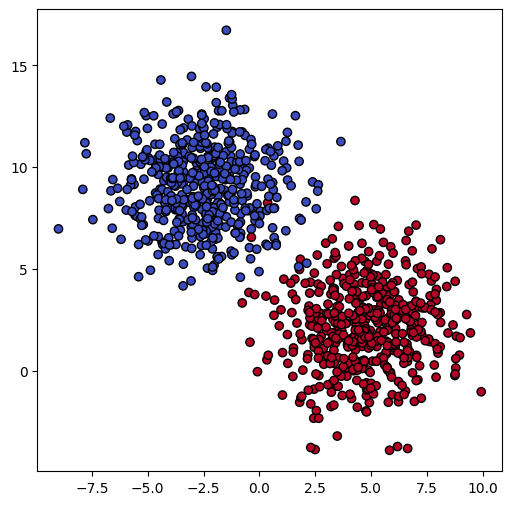

In [58]:
# Plot the generated data
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.show()

### **Train-Test Split**


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### **Create the model**
As our data is easily separable, so right now I am not uisng any hidden layers it has simple input and the output layers. We will see if we donot get good accuracy then we wil add more layers in it. As it is a binary problem so for now siggnoid as activation function in the output layer.

In [123]:
model = Sequential(
    [
        Dense(2, input_shape = (2, ), activation = 'relu'),
        Dense(1, activation = 'sigmoid')
    ])


In [124]:
model.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_47 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

### **Compile the Model**
I am using Adam optimizer as data is not very complex and a learning rate of 0.01, and binary cross entropy loss.

In [125]:
model.compile(optimizer = Adam(learning_rate=0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])

### **Fit the Model**
Now we fit the model on our data. Here I am using 400 epochs and testing data as the validation data also.

In [126]:
history = model.fit(X_train, y_train, epochs = 400, validation_data = (X_test, y_test), verbose = 0)

### **Evaluate the Model**

In [127]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

In [128]:
print(f'Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

Loss: 0.0029, Accuracy: 1.0000


The loss of 0.0029 shows that the model performance is satifactory and we donot need to add any more tuning in it.

### **Visualizations**
Now let's visualize the Decision boudaries that our model has made on the data, and also the training and testing loss over the epochs.
For this I have created a mesh grid for plotting decision boundaries in a 2D feature space. This is useful for visualizing how a classification model separates different classes.
Here's a detailed explanation of each part:

- `X[:, 0]` and `X[:, 1]` are the first and second feature columns of the dataset X, respectively.
- `x_min` and `x_max` define the minimum and maximum values for the x-axis of the plot, with a small padding of 0.1 to ensure that the plot is not too close to the edges of the feature space.
- Similarly, `y_min` and `y_max` define the range for the y-axis with padding.

- `np.meshgrid` creates a 2D grid of coordinates.
- `np.arange(x_min, x_max, 0.01)` generates values from x_min to x_max with a step size of 0.01.
- `np.arange(y_min, y_max, 0.01)` does the same for the y-axis.
- `np.meshgrid` combines these ranges to create two 2D arrays:
  - `xx` contains the x-coordinates of the grid.
  - `yy` contains the y-coordinates of the grid.

After generating the mesh grid, we wll typically use it to make predictions and plot the decision boundary.
- `np.c_[xx.ravel(), yy.ravel()]` flattens and concatenates the x and y coordinates of the mesh grid for prediction.
- `model.predict()` generates predictions for each grid point.
- `plt.contourf()` plots the decision boundary based on predictions.

In [129]:
# Create a mesh grid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the function value for the whole grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

124525/124525 ━━━━━━━━━━━━━━━━━━━━ 121s 969us/step


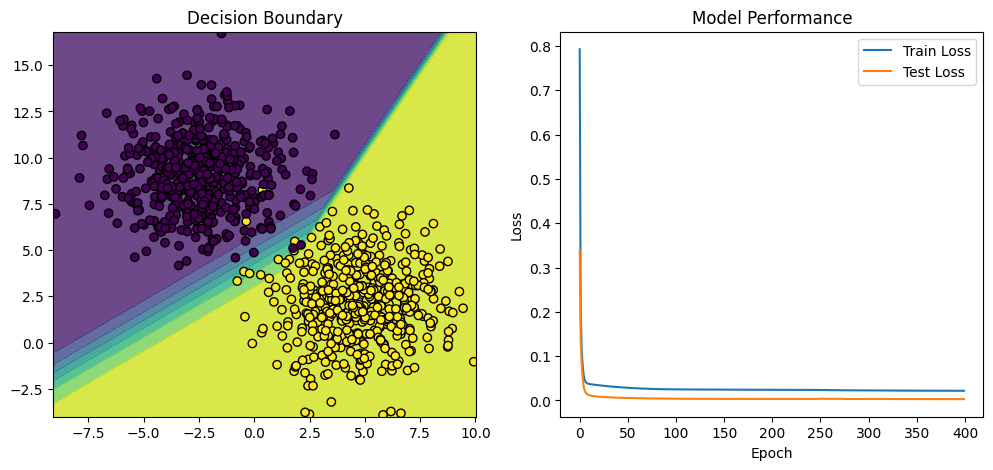

In [130]:
# Plot decision boundary
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
plt.title('Decision Boundary')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Performance')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.show()



So now we have learned how we can classify a linealry separable data using ANN. Now we will move furter and explore some more complex data and see how we can classify them using ANNs.

---
# **MODEL 2**

Now let's classify the XOR classification dataset using ANN. This dataset is more complex and wil need more hidden  layers and some hyperparameter tuning.

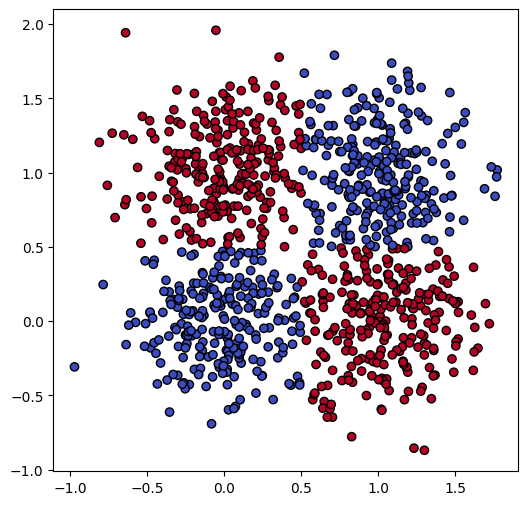

In [260]:
X, y = make_blobs(n_samples=1000, centers=[[0, 0], [1, 1], [1, 0], [0, 1]], 
                  cluster_std=0.3, random_state=42)

# Apply the XOR transformation
y = np.logical_xor(X[:, 0] > 0.5, X[:, 1] > 0.5).astype(int)


# Plot the noisy data
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.show()


### **Train-Test Split**

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### **Create the model**
So right now I am  uisng simple input and the output layers. We will see if we donot get good accuracy then we wil add more layers in it. As it is a binary problem so for now siggnoid as activation function in the output layer.

In [208]:
model = Sequential(
    [
        Dense(2, input_shape = (2, ), activation = 'relu'),
        Dense(1, activation = 'sigmoid')
    ])


In [209]:
model.summary()

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_58 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

### **Compile the Model**
I am using Adam optimizer as data is not very complex and a learning rate of 0.01, and binary cross entropy loss.

In [210]:
model.compile(optimizer = Adam(learning_rate=0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])

### **Fit the Model**
Now we fit the model on our data. Here I am using 500 epochs and testing data as the validation data also.

In [211]:
history = model.fit(X_train, y_train, epochs = 400, validation_data = (X_test, y_test), verbose = 0)

### **Evaluate the Model**

In [213]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

In [214]:
print(f'Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

Loss: 0.4191, Accuracy: 0.6900


### **Visualizations** 

In [215]:
# Create a mesh grid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the function value for the whole grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

2794/2794 ━━━━━━━━━━━━━━━━━━━━ 3s 960us/step


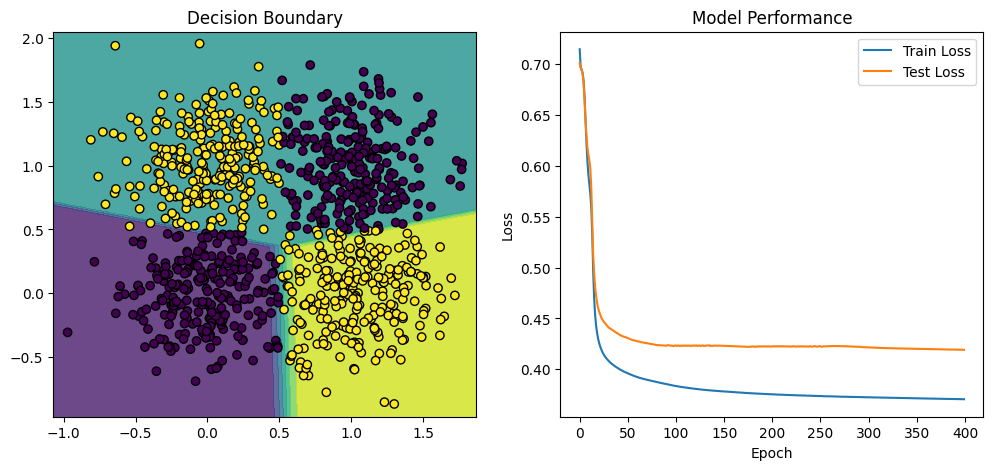

In [216]:
# Plot decision boundary
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
plt.title('Decision Boundary')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Performance')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.show()



### **Improve the Performance**
As we can see that the data has not been classified correctly, so let's increase the performance. We will add first add hidden layers in our model to see how ot impacts our results.

In [276]:
model = Sequential(
    [
        Dense(2, input_shape = (2, ), activation = 'relu'),
        Dense(4, activation = 'relu'),
        Dense(1, activation = 'sigmoid')
    ])

In [277]:
model.compile(optimizer = Adam(learning_rate=0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [278]:
history = model.fit(X_train, y_train, epochs = 400, validation_data = (X_test, y_test))

Epoch 1/400
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6192 - loss: 0.6280 - val_accuracy: 0.7950 - val_loss: 0.5647
Epoch 2/400
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8057 - loss: 0.5473 - val_accuracy: 0.8800 - val_loss: 0.4756
Epoch 3/400
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8312 - loss: 0.4722 - val_accuracy: 0.9050 - val_loss: 0.4087
Epoch 4/400
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8559 - loss: 0.4173 - val_accuracy: 0.9100 - val_loss: 0.3665
Epoch 5/400
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8673 - loss: 0.3811 - val_accuracy: 0.9050 - val_loss: 0.3376
Epoch 6/400
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8818 - loss: 0.3564 - val_accuracy: 0.9100 - val_loss: 0.3178
Epoch 7/400
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8787 - loss: 0.3397 - val_accuracy: 0.9050 - val_loss: 0.3032
Epoch 8/400
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8793 - loss: 0.3278 - val_accuracy: 0.9050 - v

In [279]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

In [280]:
print(f'Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

Loss: 0.2514, Accuracy: 0.9100


In [281]:
# Create a mesh grid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the function value for the whole grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

2794/2794 ━━━━━━━━━━━━━━━━━━━━ 3s 985us/step


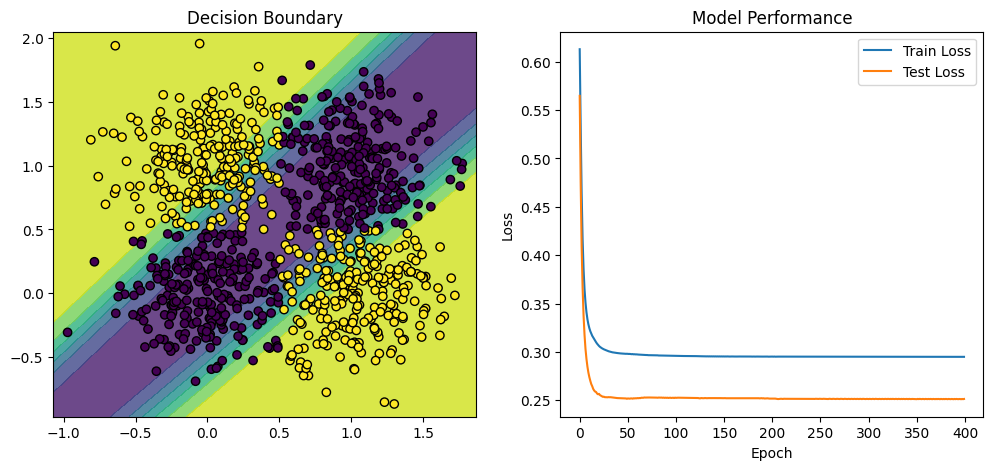

In [282]:
# Plot decision boundary
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
plt.title('Decision Boundary')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Performance')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.show()



So now we can see that our data has been classified, Now if we want to improve it further we can try adjusting the learning rate or add some regularization techniques. But we have got some accuracy still.

---
# **MODEL 3**
Now we will look into more complex data that is a spiral data and will try to classify it with the help of ANN.

Here I have created the data, as we can see that the data has a spiral like shape and when can see from inspection that it is not very easily separable, we will have to add multiple hidden layers in the model to learn the underlying features of the data.

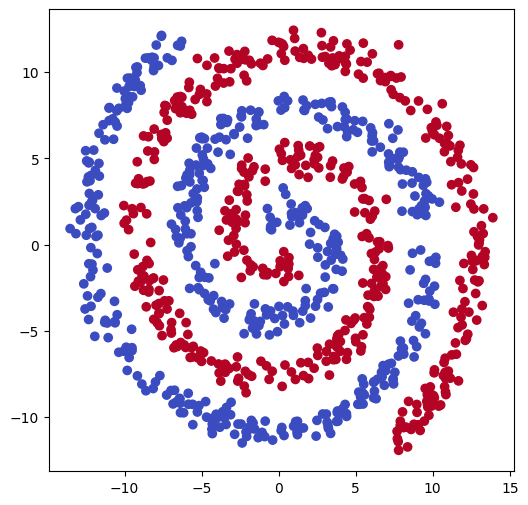

In [9]:
def create_spiral_data(n_samples, noise=0.5):
    np.random.seed(0)
    n = np.sqrt(np.random.rand(n_samples//2)) * 780 * (2 * np.pi) / 360
    d1x = -np.cos(n) * n + np.random.rand(n_samples//2) * noise
    d1y = np.sin(n) * n + np.random.rand(n_samples//2) * noise

    d2x = np.cos(n) * n + np.random.rand(n_samples//2) * noise
    d2y = -np.sin(n) * n + np.random.rand(n_samples//2) * noise

    X = np.vstack((np.append(d1x, d2x), np.append(d1y, d2y))).T
    y = np.hstack((np.zeros(n_samples//2), np.ones(n_samples//2)))

    # Add additional random noise to the coordinates
    X += np.random.randn(*X.shape) * noise

    return X, y

# Generate the data with added noise
X, y = create_spiral_data(n_samples=1000, noise=0.5)

# Plot the noisy data
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.show()


#### **USING SINGLE HIDDEN LAYER**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [293]:
model = Sequential(
    [
        Dense(2, input_shape = (2, ), activation = 'relu'),
        Dense(4, activation = 'relu'),
        Dense(1, activation = 'sigmoid')
    ])
model.compile(optimizer = Adam(learning_rate=0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 1000, validation_data = (X_test, y_test), verbose = 0)

In [294]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

Loss: 0.5475, Accuracy: 0.6700


212310/212310 ━━━━━━━━━━━━━━━━━━━━ 209s 983us/step


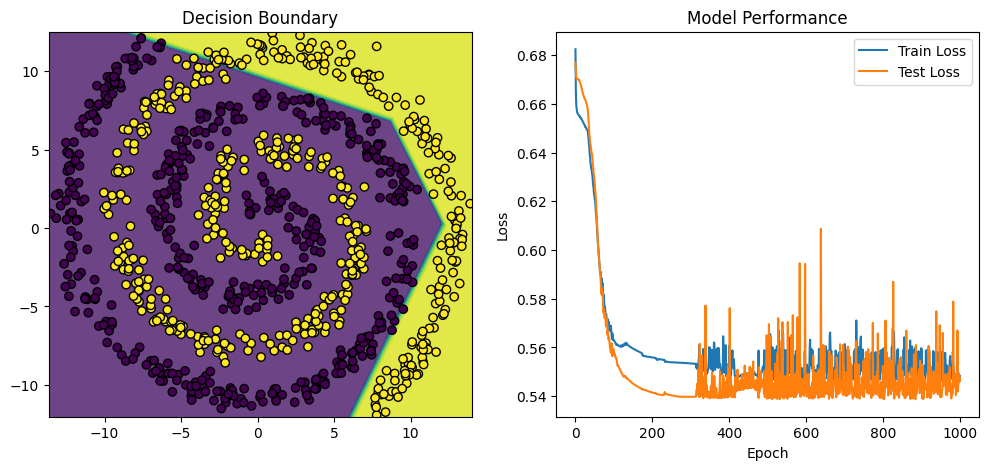

In [295]:
# Create a mesh grid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the function value for the whole grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
plt.title('Decision Boundary')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Performance')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.show()



#### **USING MORE HIDDEN LAYERS**

In [13]:
model = Sequential(
    [
        Dense(2, input_shape = (2, ), activation = 'relu'),
        Dense(16, activation = 'relu'),
        Dense(8, activation = 'relu'),
        Dense(4, activation = 'relu'),
        Dense(1, activation = 'sigmoid')
    ])
model.compile(optimizer = Adam(learning_rate=0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 1000, validation_data = (X_test, y_test), verbose = 0)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

Loss: 0.5022, Accuracy: 0.7300


212310/212310 ━━━━━━━━━━━━━━━━━━━━ 242s 1ms/step


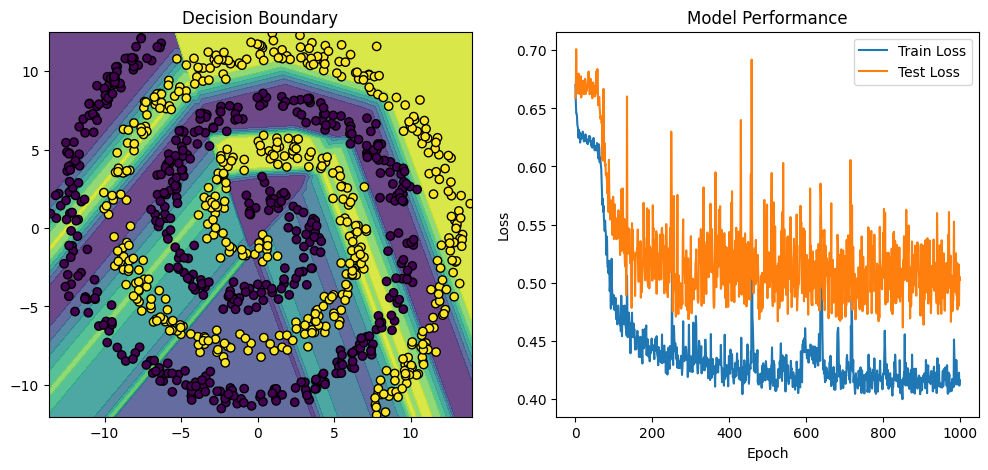

In [15]:
# Create a mesh grid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the function value for the whole grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
plt.title('Decision Boundary')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Performance')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.show()



#### **USING FEATURE TRANSFORMATION**
Now we have seen that increasing the layers is not helping, becuase the layers are not being bale to learn the underlying features of the data. So now we will use another technique that is using polynomial features. Now we will do featre transforamtion and create some polynomial features and see how it affects our model.

In [21]:
# Create polynomial features up to degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Add sine features
def add_sin_features(X):
    return np.hstack([X, np.sin(X[:, 0:2])])

# Combine the polynomial and sine features
pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    FunctionTransformer(add_sin_features, validate=False)
)

# Transform the data
X_transformed = pipeline.fit_transform(X)

In [23]:
X_transformed.shape

(1000, 7)

In [25]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)


In [98]:
model = Sequential(
    [
        Dense(7, activation='relu', input_shape=(X_transformed.shape[1],)),
        Dense(8, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ]
             )

In [100]:
model.compile(optimizer = Adam(learning_rate=0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 300, validation_data = (X_test, y_test), verbose = 0)

In [101]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

Loss: 0.0412, Accuracy: 0.9950


212310/212310 ━━━━━━━━━━━━━━━━━━━━ 252s 1ms/step


Text(0.5, 1.0, 'Decision Boundary')

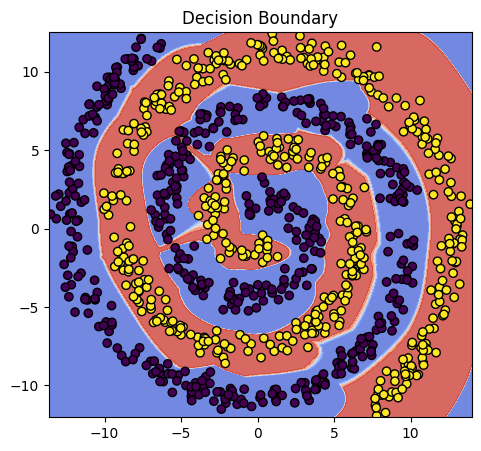

In [103]:
# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_transformed[:, 0].min() - 0.1, X_transformed[:, 0].max() + 0.1
y_min, y_max = X_transformed[:, 1].min() - 0.1, X_transformed[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Transform the mesh grid data using the same pipeline
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points_transformed = pipeline.transform(grid_points)

# Predict the function value for the whole grid
Z = model.predict(grid_points_transformed)
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
plt.title('Decision Boundary')


From the above reults we can see that feature transformation can be helpful in improving the results of the model incase the feature learning is ecoming difficult for model to learn. It helps to learn the underlying structures and do classification better.